## Demonstrating the Dual-Q Decomposition with different type of signals

Using the test signals delivered with the `tqwt_tools` module from `tqt_tools.util.test_signal`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Audio, display

from tqwt_tools import DualQDecomposition
from tqwt_tools.util import (
    low_resonance_test_signal, 
    high_resonance_test_signal, 
    speech_signal, 
    music_signal
)

In [2]:
# generic function that performs the decomposition and plots the results

def decompose_and_plot(x: np.ndarray, dq_params: dict, figsize: tuple = (16, 10), 
                       display_audio: bool = False):
    # perform decomposition
    dq = DualQDecomposition(**dq_params)
    x1, x2 = dq(x)
    
    # plot the resulting components
    max_ampl = 1.1 * np.max(np.abs(np.concatenate([x, x1, x2])))
    ylims = [-max_ampl, max_ampl]
    plt.figure(figsize=figsize)
    plt.subplot(411)
    plt.plot(x); plt.ylim(ylims); plt.title("Original Signal")
    plt.subplot(412)
    plt.plot(x2); plt.ylim(ylims); plt.title("Low Resonance Component")
    plt.subplot(413)
    plt.plot(x1); plt.ylim(ylims); plt.title("High Resonance Component")
    plt.subplot(414)
    plt.plot(x - x1 - x2); plt.ylim(ylims); plt.title("Residual")
    plt.tight_layout()
    plt.show()
    
    # plot the cost function if it was computed
    try:
        plt.plot(list(dq.history.keys()), list(dq.history.values()))
        plt.title("Cost Function")
        plt.xlabel("Iteration")
        plt.show()
    except AttributeError:
        pass
    
    if display_audio:
        print("Original Signal"); display(Audio(data=x, rate=8820))
        print("Low Resonance Component"); display(Audio(data=x2, rate=8820))
        print("High Resonance Component"); display(Audio(data=x1, rate=8820))
        print("Residual"); display(Audio(data=x-x1-x2, rate=8820))

### Artificial test signal

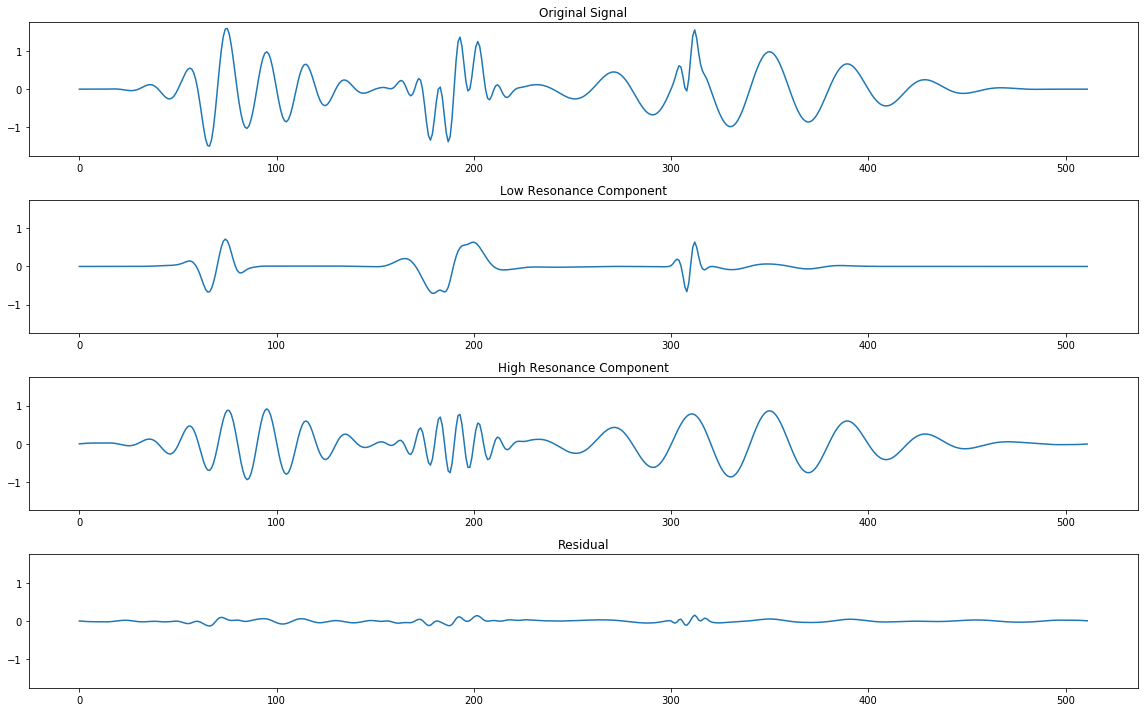

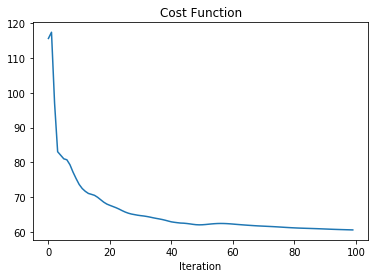

In [3]:
dq_params = {
    'q1': 3,
    'redundancy_1': 3,
    'stages_1': 19,
    'q2': 1,
    'redundancy_2': 3,
    'stages_2': 9,
    'lambda_1': 0.4,
    'lambda_2': 0.4,
    'mu': 0.1,
    'num_iterations': 100,
    'compute_cost_function': True
}

test_signal = low_resonance_test_signal() + high_resonance_test_signal()

decompose_and_plot(test_signal, dq_params)

### Speech signal "I'm"

This signal is also delivered with the original Matlab toolbox by Ivan Selesnick.

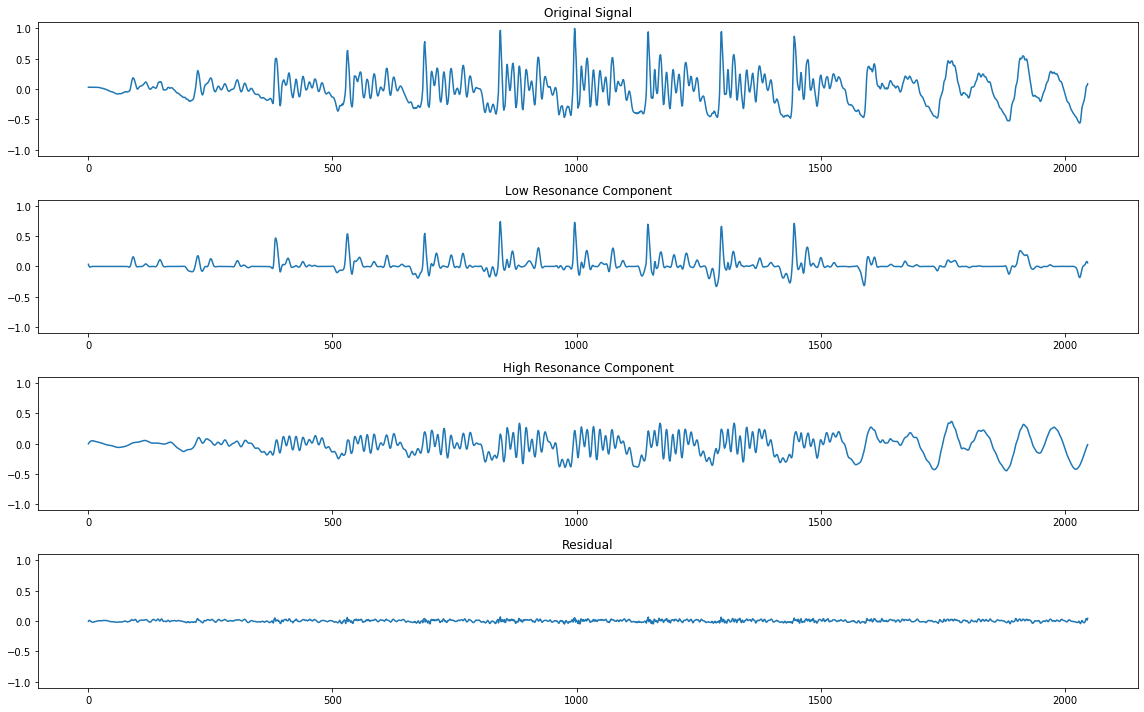

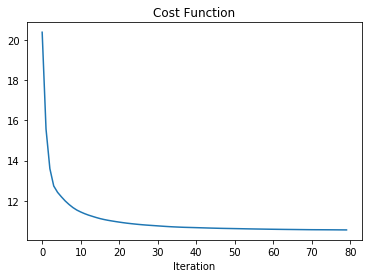

In [4]:
dq_params = {
    'q1': 6,
    'redundancy_1': 3,
    'stages_1': 32,
    'q2': 1,
    'redundancy_2': 3,
    'stages_2': 3,
    'lambda_1': 0.1,
    'lambda_2': 0.1,
    'mu': 0.5,
    'num_iterations': 80,
    'compute_cost_function': True
}

decompose_and_plot(speech_signal(), dq_params)

### Music Signal

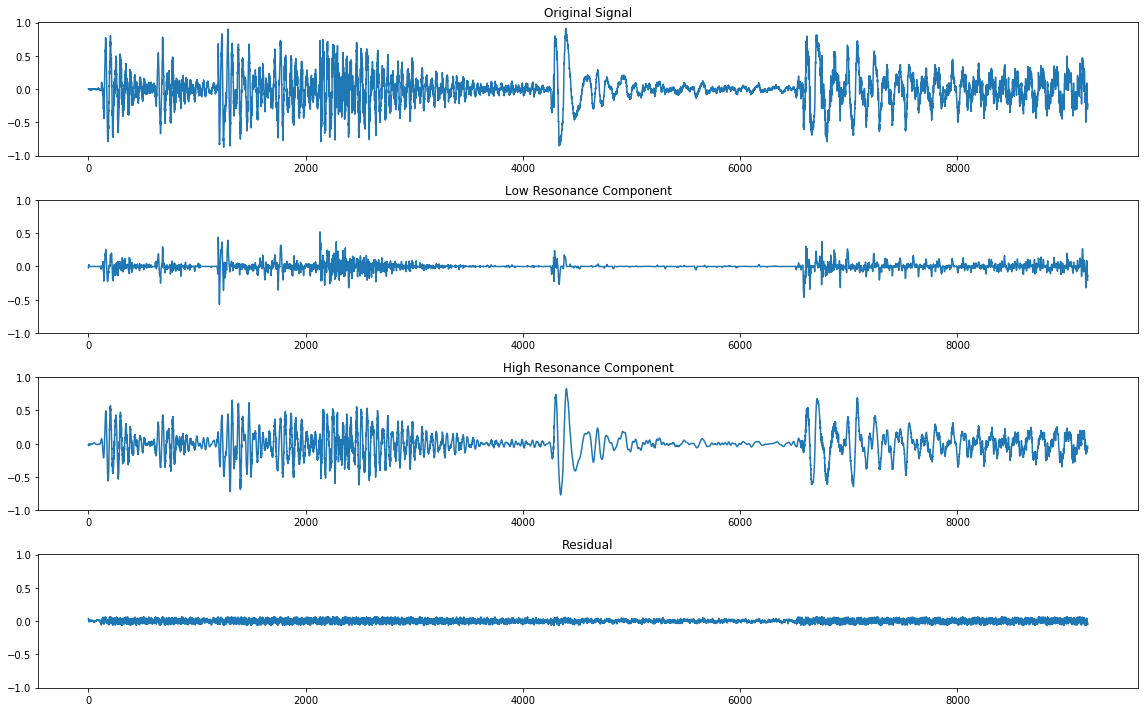

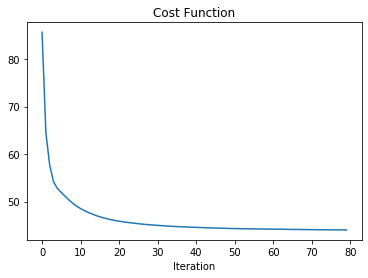

Original Signal


Low Resonance Component


High Resonance Component


Residual


In [5]:
dq_params = {
    'q1': 6,
    'redundancy_1': 3,
    'stages_1': 32,
    'q2': 1,
    'redundancy_2': 3,
    'stages_2': 3,
    'lambda_1': 0.1,
    'lambda_2': 0.1,
    'mu': 0.5,
    'num_iterations': 80,
    'compute_cost_function': True
}

decompose_and_plot(music_signal(800, 10000), dq_params, display_audio=True)